# **Import de librairies**

In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm

# **Chargement du dataset**

In [290]:
# df = pd.read_csv("SpotifyFeatures.csv")
df = pd.read_csv("/Users/beber/Documents/Cours/Wild_Code_School/Semaine_8_Visualisation_interactive_&_Pandas_approfondi/Projet_2/Datasets/SpotifyFeatures.csv")


# **EDA (Exploratory Data Analysis) + Nettoyage**

### **Exploration préliminaire**

In [291]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

### **Traitement des valeurs nulles**

In [293]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Une seule valeur nulle dans la colonne 'track_name'.

In [294]:
df[df['track_name'].isna()].index

Index([208285], dtype='int64')

In [295]:
df.iloc[208285]

genre                                World
artist_name              Elevation Worship
track_name                             NaN
track_id            7BGQCe62A58Q5ZgpQFX93t
popularity                              44
acousticness                         0.019
danceability                         0.287
duration_ms                         350027
energy                               0.446
instrumentalness                       0.0
key                                      F
liveness                               0.1
loudness                            -7.214
mode                                 Major
speechiness                         0.0317
tempo                              138.727
time_signature                         4/4
valence                             0.0387
Name: 208285, dtype: object

track_id = l'URI nous mène vers la track sur spotify
https://open.spotify.com/intl-fr/track/ 7BGQCe62A58Q5ZgpQFX93t 

Le titre du morceau s'appelle "None".

In [296]:
df = df.fillna('None')

### **Analyse et nettoyage des colonnes**

In [297]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

#### **Colonnes catégorielles**

In [298]:
colonnes_cat = df.select_dtypes(include=['object'])
colonnes_cat

,genre,artist_name,track_name,track_id,key,mode,time_signature
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,C#,Major,4/4
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,F#,Minor,4/4
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,C,Minor,5/4
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,C#,Major,4/4
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,F,Major,4/4
...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,D,Major,4/4
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,E,Minor,4/4
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,D,Major,4/4
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,A,Major,4/4


##### ***Genre***

In [299]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

erreur observée : "Children's Music", 'Children’s Music'

In [300]:
print(f"Il y a {df['genre'].nunique()} genres uniques dans le dataset" )

Il y a 27 genres uniques dans le dataset


In [301]:
df['genre'] = df['genre'].str.replace('’', "'", regex=False)
df['genre'] = df['genre'].str.lower().str.strip()

In [302]:
print(f"Il y a {df['genre'].nunique()} genres uniques dans le dataset" )

Il y a 26 genres uniques dans le dataset


In [303]:
# Afficher pour chaque genre les artistes associés présents dans le DataFrame

# On parcourt chaque genre unique du DataFrame (en ignorant les valeurs manquantes)
for genre in df["genre"].dropna().unique():
    print(f"--- Genre : {genre} ---")  # Affiche le nom du genre

    # Sélectionne les colonnes 'genre' et 'artist_name' pour les lignes correspondant à ce genre
    artistes_genre = df[df["genre"] == genre][["genre", "artist_name"]]

    # Affiche les 5 premiers artistes pour ce genre (modifiable selon le besoin)
    print(artistes_genre.head())

    print("\n")  # Saut de ligne pour séparer les genres

# Explications :
# - df["genre"].dropna().unique() : récupère tous les genres uniques présents dans le DataFrame, en ignorant les valeurs manquantes.
# - df[df["genre"] == genre][["genre", "artist_name"]] : filtre le DataFrame pour ne garder que les lignes du genre courant et sélectionne uniquement les colonnes 'genre' et 'artist_name'.
# - .head() : affiche seulement les 5 premiers résultats pour chaque genre.
# - print("\n") : ajoute un espace pour plus de lisibilité entre chaque genre.

# Raisonnement :
# - Ce code permet d'obtenir un aperçu rapide des artistes associés à chaque genre réellement présent dans le DataFrame, sans doublon de genres absents.
# - Tu peux modifier .head() ou supprimer cette méthode pour afficher tous les artistes si tu le souhaites.


--- Genre : movie ---
   genre        artist_name
0  movie     Henri Salvador
1  movie  Martin & les fées
2  movie    Joseph Williams
3  movie     Henri Salvador
4  movie       Fabien Nataf


--- Genre : r&b ---
    genre     artist_name
135   r&b   Mary J. Blige
136   r&b         Rihanna
137   r&b       Yung Bleu
138   r&b        Surfaces
139   r&b  Olivia O'Brien


--- Genre : a capella ---
         genre            artist_name
552  a capella         MC6 A Cappella
553  a capella  The Singers Unlimited
554  a capella         MC6 A Cappella
555  a capella         MC6 A Cappella
556  a capella                   Glad


--- Genre : alternative ---
           genre  artist_name
671  alternative         Joji
672  alternative         Joji
673  alternative         Joji
674  alternative  Oliver Tree
675  alternative         Joji


--- Genre : country ---
       genre   artist_name
688  country           Cam
689  country  Kevin Fowler
690  country  Roger Miller
691  country       M. Ward
692  

constat d'incohérence probant :imprim écran Céline Dion ou Francis Lalane 

In [304]:
df_Celine_Dion = df[df["artist_name"] == "Céline Dion"]
df_Celine_Dion.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
14058,dance,Céline Dion,"Because You Loved Me (Theme from ""Up Close and...",1NOeZ7ZIVKMebuza26rofd,74,0.31400,0.614,273667,0.466,0.000000,C#,0.0990,-9.881,Major,0.0327,119.916,4/4,0.1780
15076,dance,Céline Dion,The Power of Love,5kK1Iru9ogP3Iy1zsANU1n,67,0.36000,0.546,342400,0.519,0.000460,G#,0.2400,-9.072,Major,0.0291,140.054,4/4,0.2470
15644,dance,Céline Dion,That's the Way It Is,5s4catxeZsaWFnOrvrXZHf,64,0.15400,0.634,241373,0.886,0.000000,A,0.1180,-5.424,Major,0.0434,93.040,4/4,0.5770
15864,dance,Céline Dion,All By Myself,20EpQjfV7B4ZQJkIdHO1Tw,65,0.34800,0.344,312307,0.325,0.023900,B,0.0686,-10.005,Minor,0.0287,118.556,4/4,0.0773
16656,dance,Céline Dion,The Power of Love - Radio Edit,2PFAYhBcNRj1UaluR7ZgUy,63,0.36900,0.536,286893,0.523,0.000525,G#,0.2270,-8.885,Major,0.0306,140.059,4/4,0.2360
16852,dance,Céline Dion,I'm Alive,3qjXFLKMp4zfMmugEGPaBx,63,0.02470,0.691,210227,0.640,0.000005,G#,0.2000,-5.087,Major,0.0384,101.991,4/4,0.4520
18176,dance,Céline Dion,To Love You More - Radio Edit,0UEqov6I69uqwBG6J2wMwC,56,0.29800,0.494,279360,0.596,0.000000,A,0.2190,-6.641,Major,0.0311,119.971,4/4,0.1660
18800,dance,Céline Dion,I Drove All Night,3zN4OLeBAN7LwAr442bB8E,56,0.00051,0.566,240600,0.912,0.000000,B,0.2150,-4.198,Major,0.0629,134.994,4/4,0.6440
18948,dance,Céline Dion,A New Day Has Come - Radio Remix,1vmdrRKK1sY1pyzbMeoPwq,56,0.08260,0.574,259773,0.691,0.000017,F#,0.1490,-5.103,Major,0.0350,91.969,4/4,0.1950
19133,dance,Céline Dion,Pour que tu m'aimes encore,4iNAWrVbJI431V9YVyZ4wR,44,0.32600,0.537,254093,0.602,0.000115,D,0.0548,-8.937,Major,0.0700,180.077,4/4,0.5090


In [305]:
df_Francis_Lalanne = df[df["artist_name"] == "Francis Lalanne"]
df_Francis_Lalanne

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
54368,movie,Francis Lalanne,Fin du contrat Warner (Interview),0DpSewGIIgN8XF7HI97B7N,0,0.6900,0.516,134053,0.428000,0.000021,C,0.6340,-21.956,Major,0.9160,77.011,1/4,0.2000
55494,movie,Francis Lalanne,Il pleure dans mon cœur - Paul Verlaine,2SHdh3qN7gGPJGWHFEnp0n,4,0.4330,0.301,128000,0.164000,0.145000,G,0.1020,-18.894,Minor,0.0373,74.799,3/4,0.1540
55583,movie,Francis Lalanne,Sa famille. Changement de vie (Interview),2eZahkqBTze9HTbBQfOMDX,0,0.8080,0.540,245627,0.500000,0.000001,F#,0.4230,-21.266,Major,0.9170,82.569,4/4,0.4580
55715,movie,Francis Lalanne,La maison du bonheur,5ZU4BhQcPL4BufC5gxc360,1,0.2410,0.154,331347,0.412000,0.000002,B,0.8180,-10.434,Major,0.0384,74.562,4/4,0.1020
55757,movie,Francis Lalanne,Quand je chante - Live,0gMf3M9tUTBG6QY6mEJOwD,3,0.7440,0.477,107933,0.082800,0.000000,C#,0.5270,-20.658,Major,0.3100,79.899,3/4,0.3050
55800,movie,Francis Lalanne,Avec le temps,4P72CXog5XH4vTtmXDVifJ,0,0.5970,0.247,260120,0.341000,0.001020,A,0.0960,-9.333,Minor,0.0320,72.659,4/4,0.2040
55822,movie,Francis Lalanne,Ce Moment d'Etre,6AnkHqBGJXdqbiqdY5RxRS,0,0.6610,0.237,239853,0.283000,0.000012,E,0.1050,-14.632,Major,0.0414,83.347,4/4,0.1610
55833,movie,Francis Lalanne,Genèse de l’album « À Léo » (Interview),79dGGaddu5FsdmlWufEEgN,0,0.9110,0.500,211053,0.489000,0.000000,D,0.6620,-19.386,Major,0.9430,78.138,3/4,0.5770
55998,movie,Francis Lalanne,Reniements,7rZDKamibehUwi1UCkaz1G,0,0.8040,0.309,211093,0.174000,0.000000,D,0.1140,-16.093,Minor,0.0476,86.441,5/4,0.2090
56216,movie,Francis Lalanne,Si Tu Te Moques D'Un Mec Qui Pleure,1AyXoelFwXegavvJpbguZx,1,0.8100,0.453,342160,0.084700,0.000000,G,0.0808,-18.086,Major,0.1220,77.698,3/4,0.1320


In [306]:
df_Cocteau_Twins = df[df["artist_name"] == "Cocteau Twins"]
df_Cocteau_Twins

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
10230,alternative,Cocteau Twins,Cherry-coloured Funk,6sVQNUvcVFTXvlk3ec0ngd,57,0.001740,0.377,192467,0.650,0.000058,D,0.1070,-5.902,Major,0.0290,180.074,4/4,0.365
20391,dance,Cocteau Twins,Cherry-coloured Funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.001740,0.377,192467,0.650,0.000058,D,0.1070,-5.902,Major,0.0290,180.074,4/4,0.365
22947,electronic,Cocteau Twins,Cherry-coloured Funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.001740,0.377,192467,0.650,0.000058,D,0.1070,-5.902,Major,0.0290,180.074,4/4,0.365
23984,electronic,Cocteau Twins,Heaven Or Las Vegas,1bwXRScnt3k6vSyVqcKyNj,54,0.000088,0.215,298400,0.801,0.007250,G,0.0808,-5.460,Major,0.0379,180.090,4/4,0.401
25239,electronic,Cocteau Twins,Pitch The Baby,3BJqEsMJ6gxMRNBr6DJAq8,49,0.445000,0.480,194080,0.827,0.341000,G,0.5600,-6.712,Minor,0.0414,178.136,4/4,0.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220885,world,Cocteau Twins,Alice,4mfNiZl9qisxdLiLHIRa4n,29,0.960000,0.363,267827,0.368,0.950000,A#,0.0538,-11.770,Minor,0.0307,138.888,4/4,0.190
220891,world,Cocteau Twins,Fluffy Tufts,2OG3twfyEivK0sPylA3jmO,34,0.952000,0.389,185667,0.202,0.007610,F#,0.2180,-17.350,Minor,0.0356,99.836,4/4,0.252
220958,world,Cocteau Twins,Athol-brose,6FwoAekQelrCxhP9tVu1ju,36,0.000574,0.481,179280,0.625,0.788000,F,0.1240,-5.816,Major,0.0383,120.078,4/4,0.437
221353,world,Cocteau Twins,Amelia,5QO4lhAf3vWJbnJBGxzPNK,34,0.000221,0.239,211667,0.659,0.364000,D#,0.0791,-10.474,Major,0.0390,176.563,3/4,0.394


Enrichissement à prévoir sur la colonne genre pour avoir plus de cohérence et retrouver la variété française.

##### ***Artist name***


In [307]:
print(f"Il y a {df['artist_name'].nunique()} noms d'artistes uniques dans ce dataset.")

Il y a 14564 noms d'artistes uniques dans ce dataset.


In [308]:
df['artist_name'].value_counts().head(28)

artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
Wolfgang Amadeus Mozart      800
Randy Newman                 757
Georges Bizet                701
Juice Music                  684
Johann Sebastian Bach        632
Ludwig van Beethoven         596
Hans Zimmer                  559
Gioachino Rossini            491
Chorus                       480
Howard Shore                 479
Drake                        477
Henri Salvador               474
John Williams                450
Frédéric Chopin              436
Alan Menken                  420
Chris Brown                  392
Bob Marley & The Wailers     380
Dorothée                     378
Gaetano Donizetti            377
Children Songs Company       371
Max Richter                  365
Capcom Sound Team            326
Future                       317
Name: count, dtype: int64

In [309]:
df['artist_name'] = df['artist_name'].str.replace('’', "'",  regex=False)  # apostrophe typographique
df['artist_name'] = df['artist_name'].str.lower().str.strip()  # minuscule + suppression espaces    

In [310]:
print(f"Il y a {df['artist_name'].nunique()} noms d'artistes uniques dans ce dataset.")

Il y a 14561 noms d'artistes uniques dans ce dataset.


Voir si pas d'autres fautes orthographes : 
- & et and par exemple.
- retirer The

L'artiste au plus grand nombre de titres dans le dataset est Verdi qui en compte 1394.

Voir 

##### ***Track name***

In [311]:
print(f"Il y a {df['track_name'].nunique()} noms de titres uniques dans ce dataset.")

Il y a 148615 noms de titres uniques dans ce dataset.


In [312]:
df['track_name'] = df['track_name'].str.replace('’', "'",  regex=False)  # apostrophe typographique
df['track_name'] = df['track_name'].str.lower().str.strip()  # minuscule + suppression espaces    

In [313]:
print(f"Il y a {df['track_name'].nunique()} noms de titres uniques dans ce dataset.")

Il y a 145281 noms de titres uniques dans ce dataset.


Voir d'autres fautes d'orthographes.

#####  ***Track id***

In [314]:
print(f"Il y a {df['track_id'].nunique()} URI uniques dans ce dataset.")

Il y a 176774 URI uniques dans ce dataset.


In [315]:
df['track_id'].value_counts().head(28)

track_id
0UE0RhnRaEYsiYgXpyLoZc    8
0wY9rA9fJkuESyYm9uzVK5    8
3R73Y7X53MIQZWnKloWq5i    8
3uSSjnDMmoyERaAK9KvpJR    8
6AIte2Iej1QKlaofpjCzW1    8
6sVQNUvcVFTXvlk3ec0ngd    8
3KN0D3jPB4Hqi1xyuOoeKL    7
0szSOfZVM3G5mWI1ogQjr7    7
5gW5dSy3vXJxgzma4rQuzH    7
6R6ihJhRbgu7JxJKIbW57w    7
2073QOEC8rBtSyTsRyaWiP    7
6ZXoX3GiljGiuQpGCjWJI3    7
5cwN1htZyoWqZCc33f3RfE    7
5YxaccATvDTIOpue7vu6Tn    7
4osgfFTICMkcGbbigdsa53    7
3SwhPTNNU5hpF33bbCsji6    7
7CEV9VwA8XO9wwxTXgYKvY    7
5rAff9XfcWx7rguN3t0fkW    7
2T64m94VBrsEISkAYq6Cnq    7
72hSmnleYTiiOo23q8ZJIS    7
2SYvX2G6D5SD6BpijIOBpG    7
56RfNBJGUgL1ZFCB1KEJrQ    7
2q0VexHJirnUPnEOhr2DxK    7
5E5HYgxGMp3BPakHGfKfIB    7
6D53lwtCp4kY6B7aZGkOxB    7
360NCp4XoQ0sFi5jgu5Ww7    7
68dd9CEzAUc4zeukKzMJP5    7
1Z2MfAx1nJ09NzGjodnvRW    7
Name: count, dtype: int64

In [316]:
# track_id = l'URI nous mène vers la track sur spotify
# https://open.spotify.com/intl-fr/track/ 7BGQCe62A58Q5ZgpQFX93t 

##### **Analyse croisée artist_name / track_name :**

In [317]:
df[df['artist_name'] == 'Giuseppe Verdi']['track_name'].value_counts().head(10)

Series([], Name: count, dtype: int64)

En prenant Verdi pour exemple on observe qu'un même titre peut apparaitre plusieurs fois dans le dataset.

Pour éviter les doublons, nous conservons la version la plus populaire pour chaque couple track_name / artist_name.

In [318]:
df= df.loc[df.groupby(['track_name', 'artist_name'])['popularity'].idxmax()]
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 175614 lignes.


##### ***Key***

In [319]:
df['key'].unique()

array(['F', 'C#', 'G#', 'C', 'D', 'D#', 'G', 'B', 'A#', 'A', 'E', 'F#'],
      dtype=object)

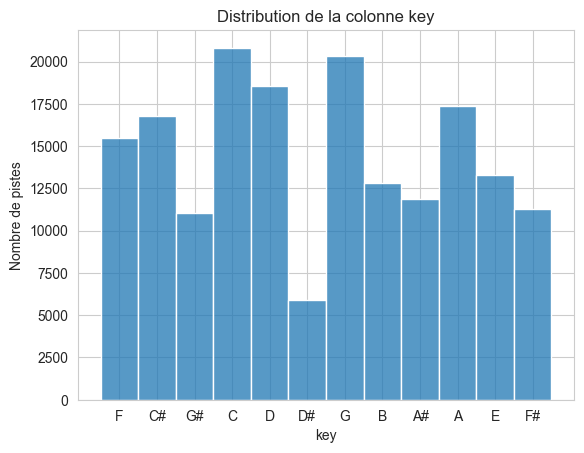

In [320]:
counts_key = df['key'].value_counts()
sns.histplot(data=df, x="key")
plt.title('Distribution de la colonne key')
plt.xlabel('key')
plt.ylabel('Nombre de pistes')
plt.show()

C:\Users\beber\AppData\Local\Temp\ipykernel_27940\2659825684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


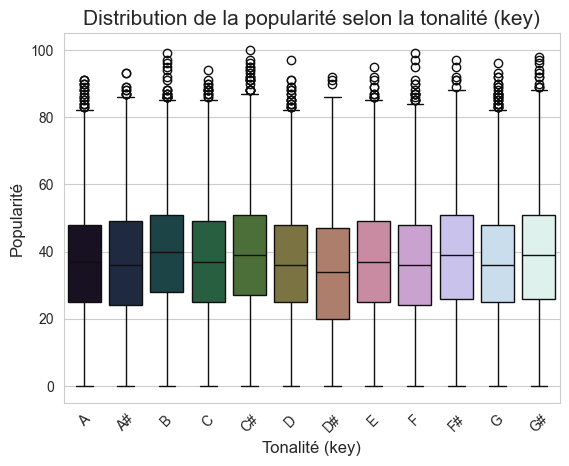

In [321]:
# Boxplot pour la variable "key"
# Objectif : visualiser la distribution d'une variable numérique (par exemple "popularity") selon chaque tonalité ("key")

sns.set_style("whitegrid")  # Ajoute une grille de fond pour une meilleure lisibilité

# Création du boxplot : on affiche la distribution de la popularité pour chaque "key"
ax = sns.boxplot(
    data=df,                  # DataFrame contenant les données
    x="key",                          # Variable catégorielle sur l'axe des x (tonalité)
    y="popularity",                   # Variable numérique sur l'axe des y (exemple : popularité)
    palette="cubehelix",              # Palette de couleurs pour différencier les tonalités
    order=sorted(df["key"].unique())  # Trie les tonalités pour un affichage ordonné
)

# Ajout d'un titre et de labels explicites pour les axes
plt.title('Distribution de la popularité selon la tonalité (key)', fontsize=15)
plt.xlabel('Tonalité (key)', fontsize=12)
plt.ylabel('Popularité', fontsize=12)

# Optionnel : rotation des labels x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichage du graphique final
plt.show()

Voir les corrélations avec mode et valence dans la suite de l'analyse.

Commentaire d'analyse

##### ***Mode***

In [322]:
df["mode"].unique()

array(['Major', 'Minor'], dtype=object)

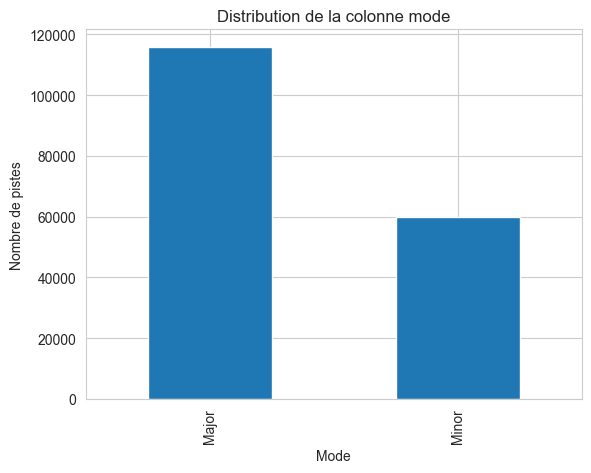

In [323]:
counts = df['mode'].value_counts()
counts.plot(kind='bar')
plt.title('Distribution de la colonne mode')
plt.xlabel('Mode')
plt.ylabel('Nombre de pistes')
plt.show()

COmmentaires?

***Time signature***

In [324]:
df['time_signature'].describe()

count     175614
unique         5
top          4/4
freq      148228
Name: time_signature, dtype: object

In [325]:
df['time_signature'].unique()

array(['4/4', '3/4', '5/4', '1/4', '0/4'], dtype=object)

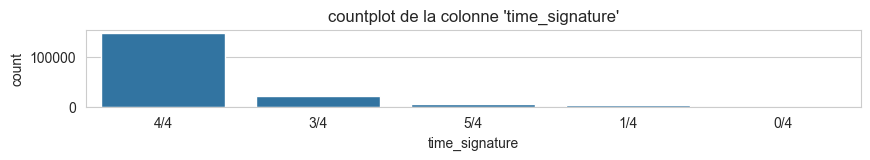

In [326]:
plt.figure(figsize=(10, 1))
sns.countplot(x=df['time_signature'])
plt.title("countplot de la colonne 'time_signature'")
plt.show()

- je supprime les valeurs aberrantes 0 Impossible en musique → à supprimer
- et 1 Musicalement peu plausible → probablement une erreur de parsing ou un tag incohérent

Verifier 1/4 si la valeur n'est pas mal enregistrée.

In [327]:
# Extraire uniquement le numérateur de la signature (4, 5, 3, etc.) pour en faire une colonne numérique propre.
# Étape 1 : Extraire la partie avant le '/' et la convertir en entier
df['time_signature_clean'] = df['time_signature'].str.extract(r'^(\d+)').astype('Int64')
df['time_signature'] = df['time_signature_clean']
df.drop(columns='time_signature_clean', inplace=True)


df = df[df['time_signature'].isin([3, 4, 5])]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
33675,anime,yuki hayashi,"""6人で(強い方が強い)""",0qwK0LvMyAQ7J1rEEL6nbr,17,0.971000,0.176,171000,0.125,0.904000,C,0.129,-16.699,Major,0.0349,136.076,3,0.0461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


#### **Colonnes numériques**

In [328]:
# Sélection numérique
colonnes_num = df.select_dtypes(include=['float64', 'int64'])
colonnes_num

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
58300,31,0.993000,0.364,131933,0.275,0.028400,0.293,-11.832,0.0430,86.096,4,0.0394
32571,23,0.025000,0.250,158000,0.762,0.516000,0.094,-12.794,0.0468,89.093,3,0.0835
89661,53,0.002750,0.968,238020,0.563,0.000000,0.108,-6.744,0.1250,130.039,4,0.3240
142359,48,0.000696,0.315,202493,0.970,0.000000,0.277,-4.709,0.1020,178.068,4,0.4230
33675,17,0.971000,0.176,171000,0.125,0.904000,0.129,-16.699,0.0349,136.076,3,0.0461
...,...,...,...,...,...,...,...,...,...,...,...,...
150871,63,0.014800,0.700,193579,0.873,0.000000,0.343,-2.901,0.0869,99.972,4,0.6120
219320,30,0.729000,0.332,260600,0.493,0.000000,0.165,-6.126,0.0318,110.024,4,0.1550
149889,64,0.002110,0.613,205149,0.874,0.000000,0.134,-3.712,0.0335,102.975,4,0.6510
220337,27,0.513000,0.521,298760,0.423,0.000004,0.131,-6.770,0.0324,59.036,4,0.2740


In [329]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,173281.000000,173281.000000,173281.000000,1.732810e+05,173281.000000,173281.000000,173281.000000,173281.000000,173281.000000,173281.000000,173281.0,173281.000000
mean,36.691062,0.398999,0.542934,2.365783e+05,0.559895,0.171111,0.223413,-10.057533,0.125669,117.354701,3.90632,0.453408
std,17.549541,0.364926,0.189866,1.298382e+05,0.274677,0.322051,0.209568,6.342215,0.200999,31.314278,0.368517,0.267547
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,3.0,0.000000
25%,25.000000,0.044100,0.418000,1.789950e+05,0.350000,0.000000,0.097400,-12.715000,0.036800,92.050000,4.0,0.224000
50%,37.000000,0.279000,0.560000,2.197600e+05,0.595000,0.000070,0.130000,-8.127000,0.049400,115.074000,4.0,0.443000
75%,49.000000,0.783000,0.685000,2.687470e+05,0.791000,0.088000,0.276000,-5.605000,0.101000,139.005000,4.0,0.669000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,5.0,1.000000


##### ***Popularity***

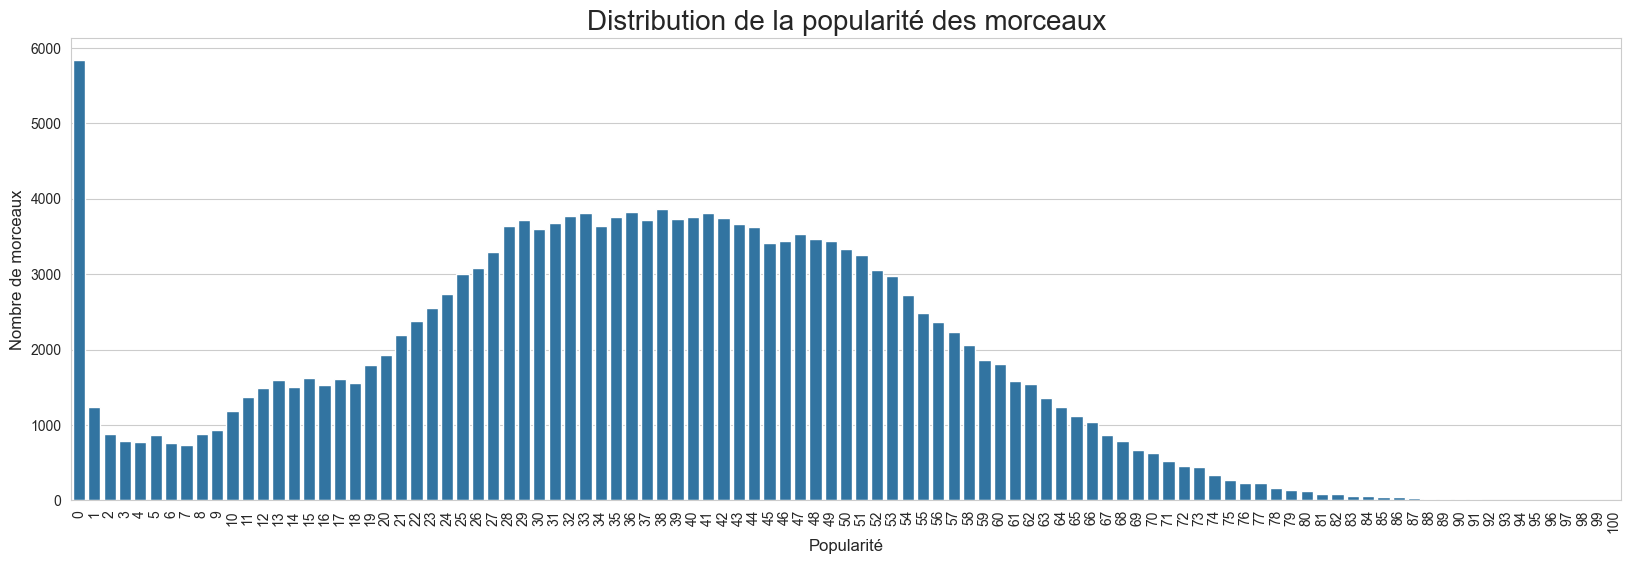

In [330]:
plt.figure(figsize=(20, 6))  
sns.countplot(data=df,
              x='popularity')

plt.title('Distribution de la popularité des morceaux', fontsize=20)
plt.xlabel('Popularité', fontsize=12)
plt.ylabel('Nombre de morceaux', fontsize=12)
plt.xticks(rotation=90)  
plt.show()

Pour chaque titre de chanson unique (track_name) sélectionne la ligne ayant la popularité maximale (popularity) dans le DataFrame df.

In [331]:
df = df.loc[df.groupby('track_name')['popularity'].idxmax()]

On décide de ne garder que les scores au dessus de 20/100 de popularité.

In [332]:
df = df[df['popularity'] >= 20] 

In [333]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 118542 lignes.


##### ***Acousticness***

##### ***Danceability***

##### ***Duration ms***

##### ***Energy***

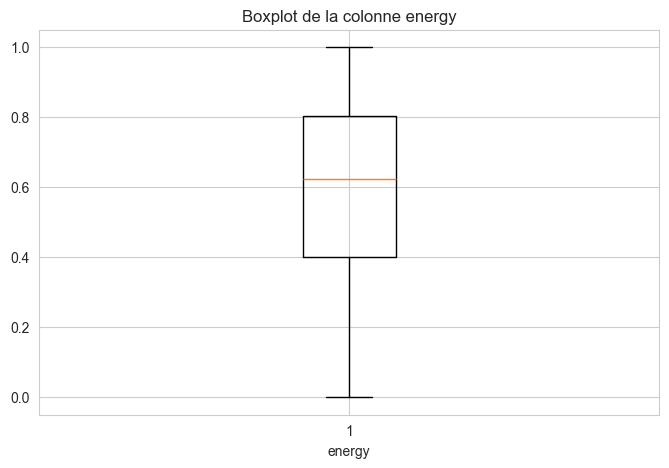

In [334]:
plt.figure(figsize=(8, 5))
plt.boxplot(x= df['energy'])

plt.title('Boxplot de la colonne energy')
plt.xlabel('energy')

plt.show()

- La médiane au-dessus de 0.6 montre que plus de la moitié des morceaux ont un niveau d’énergie modéré à élevé.
- Possible classification à réaliser morceaux en faible / moyenne / forte énergie pour répondre à l'activité

##### ***Instrumentalness***

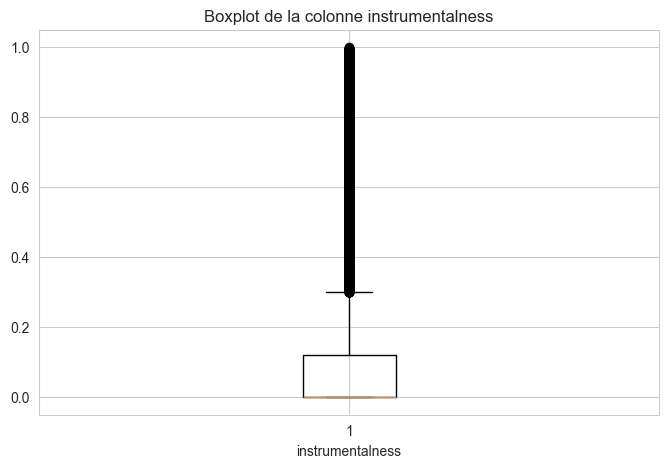

In [335]:
plt.figure(figsize=(8, 5))
plt.boxplot(x= df['instrumentalness'])

plt.title('Boxplot de la colonne instrumentalness')
plt.xlabel('instrumentalness')

plt.show()

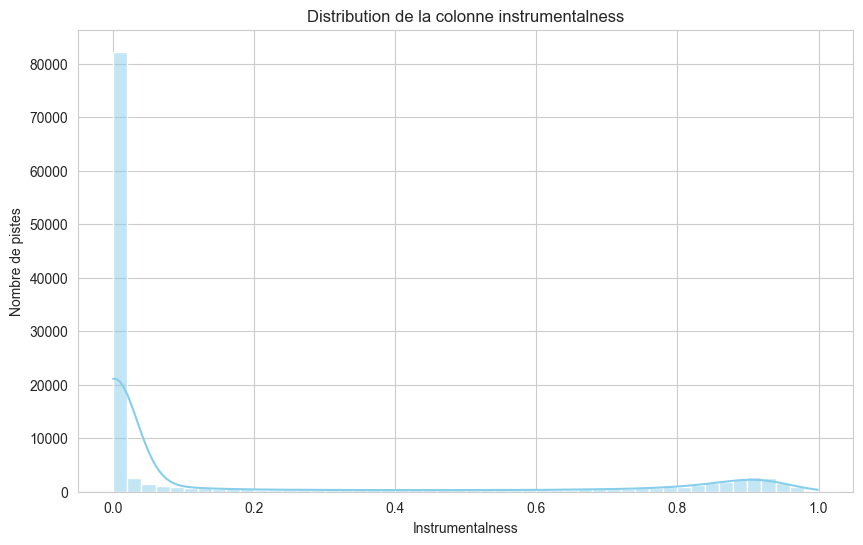

In [336]:
plt.figure(figsize=(10, 6))
sns.histplot(df['instrumentalness'], bins=50, kde=True, color='skyblue')

plt.title('Distribution de la colonne instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Nombre de pistes')
plt.grid(True)
plt.show()


- La base de données est largement dominée par des chansons vocales.
- Pas de nettoyage à réaliser.

##### ***Liveness***

In [337]:
df['liveness'].describe()

count    118542.000000
mean          0.214476
std           0.199656
min           0.010500
25%           0.096600
50%           0.127000
75%           0.263000
max           1.000000
Name: liveness, dtype: float64

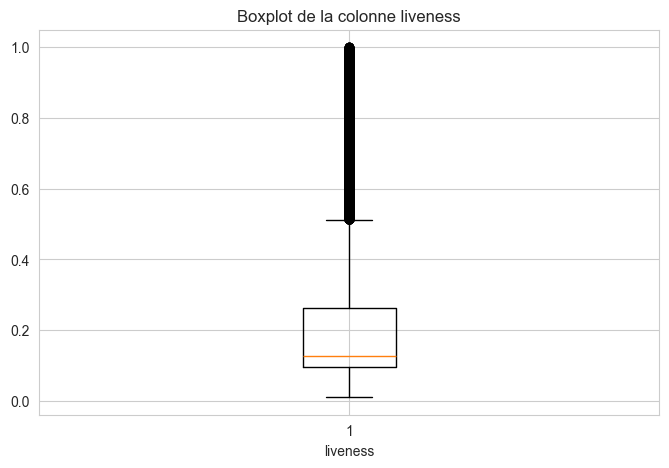

In [338]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['liveness'])

plt.title('Boxplot de la colonne liveness')
plt.xlabel('liveness')

plt.show()


- Le dataset est majoritairement composé de musique studio.
- Plus de 50 % des chansons n'ont que peu ou pas de caractéristiques live.
- Un seuil à 0.8 reste raisonnable pour retirer les vraies captations live.
- Un seuil à 0.5 "possiblement live"

In [339]:
df = df[df['liveness'] < 0.8]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [340]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 114484 lignes.


##### ***Tempo***

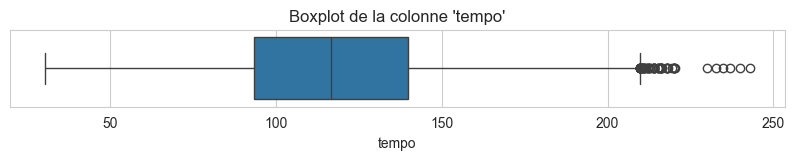

In [341]:
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['tempo'])
plt.title("Boxplot de la colonne 'tempo'")
plt.show()

In [342]:
# Calcul des bornes IQR
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Borne basse : {lower_bound:.2f}")
print(f"Borne haute : {upper_bound:.2f}")

Borne basse : 23.72
Borne haute : 209.70


In [343]:
# # on clean en gardant les valeurs entre les bornes
# df = df[(df['tempo'] >= 23.82) & (df['tempo'] <= 208.20)]
# df

In [344]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 114484 lignes.


In [366]:
df['tempo'].describe()

count    107897.000000
mean        119.611196
std          30.623422
min          31.689000
25%          94.965000
50%         118.073000
75%         140.039000
max         242.903000
Name: tempo, dtype: float64

In [345]:
df['tempo'].describe(percentiles= (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))

count    114484.000000
mean        118.299894
std          31.050363
min          30.379000
0%           30.379000
10%          79.986000
20%          89.942000
30%          96.969000
40%         105.989000
50%         116.609500
60%         125.094800
70%         134.294000
80%         144.942000
90%         164.008000
100%        242.903000
max         242.903000
Name: tempo, dtype: float64

In [361]:
df[df['tempo'] < 40].head(15)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
124661,classical,gustavo santaolalla,all gone (aftermath),05704F5Uk32MIb9tX5omWQ,44,0.986,0.2390,64440,0.0607,0.685000,E,0.1130,-22.497,Minor,0.0417,38.137,4,0.0372
176915,jazz,chad lawson trio,angels we have heard on high,5wcHHljUfrBxJh3Uk42u4m,38,0.949,0.5850,173520,0.2210,0.813000,D,0.1060,-18.264,Minor,0.0513,36.970,4,0.2830
177797,jazz,nat king cole,away in a manger,22hVlcdlfqmtOuEih4hZcH,35,0.971,0.3760,120400,0.1520,0.000099,G#,0.1050,-18.377,Major,0.0326,34.765,3,0.2530
147309,jazz,flughand,beems,7HH4IZ5FJt5djG0BnZpr5S,43,0.593,0.4930,77423,0.1360,0.036900,F,0.1230,-12.180,Minor,0.4410,37.833,4,0.7700
58845,opera,tomaso albinoni,"concerto for 2 oboes in f major, op. 9, no. 3:...",4nw7XaMNG2AeBKJXHl6exk,24,0.932,0.3220,131507,0.1420,0.856000,D,0.1600,-18.834,Minor,0.0382,37.099,4,0.1200
104729,classical,ludwig van beethoven,"diabelli variations, op. 120: var. 7, un poco ...",5Wb7qMjogMRxLKXaHEyt4r,22,0.975,0.2540,79587,0.2410,0.889000,C,0.1200,-19.764,Major,0.0360,34.347,3,0.1930
206288,soundtrack,hans zimmer,even the trees hate us,3YGSzcL5MnxOuHm5NiSJpR,26,0.883,0.0684,221533,0.0955,0.894000,D,0.1010,-22.589,Minor,0.0388,39.575,4,0.0368
228415,soul,michl,everything'll change,0nPBT7Qv66iUOjnutDXOgw,47,0.499,0.5590,168174,0.3730,0.000013,F,0.1240,-9.550,Major,0.0924,36.542,4,0.1200
182026,movie,kristin chenoweth,"finale ""wicked"" - from ""wicked"" original broad...",5GnZCU9UmSRnIUypNwfjgS,41,0.953,0.3300,101693,0.1970,0.076500,G,0.2230,-10.538,Major,0.0332,34.157,3,0.0776
49948,blues,jack white,fly farm blues,3kMmIXpAFE6saaQO0r37Pg,32,0.603,0.2470,197912,0.4960,0.477000,B,0.3840,-14.858,Minor,0.0502,35.204,4,0.6900


In [ ]:
# Tempo > 40bpm : pas d'erreurs manifestes constatées
# Ne pas supprimer les lignes

In [363]:
df[df['tempo'] >= 200]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
45774,blues,otis redding,(sittin' on) the dock of the bay,50uGbeaQIxKiSc7jvRTjWx,63,0.72600,0.486,166827,0.312,0.000002,D,0.0601,-13.522,Major,0.0533,205.917,4,0.598
216322,country,ronnie milsap,(there's) no gettin' over me,2ZBey93WnEJiK6dq9fNNeW,44,0.54900,0.599,196293,0.470,0.000025,F#,0.3040,-10.477,Minor,0.0337,200.631,4,0.811
178254,jazz,nancy wilson,(you don't know) how glad i am,4YkN3JlceD5n2aMqL1kFnH,40,0.73700,0.326,157387,0.441,0.000010,F,0.3280,-9.117,Major,0.0479,208.072,3,0.622
143657,indie,the districts,4th and roebling,2RpMHnKzl9tUM8I7DBsjqJ,47,0.00241,0.264,289600,0.654,0.011100,C#,0.1230,-6.420,Minor,0.0697,206.744,4,0.277
1976,country,aaron lewis,75,5nZ1p0NXZwPxF9nDxhVrW3,42,0.32100,0.295,342000,0.460,0.003730,D#,0.2030,-6.310,Major,0.0280,200.104,3,0.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,anime,ai otsuka,大好きだよ。,5R4wugcX7fupglixKuYl0u,28,0.70700,0.245,282400,0.412,0.000000,F#,0.1430,-5.929,Minor,0.0334,206.101,3,0.465
32047,anime,silent siren,恋のエスパー,5eeIMlpmBKo7bOvU118yA5,33,0.00170,0.538,230653,0.944,0.009830,C,0.0774,-2.490,Major,0.0690,200.057,4,0.796
35201,anime,keytalk,暁のザナドゥ,0DUArzYdyGEbTVZlRzsili,27,0.00235,0.283,194733,0.967,0.000000,B,0.3310,-2.206,Major,0.1570,203.103,4,0.415
30981,anime,glay,空が青空であるために,6wfYng9wQprhKrpSJlvkqL,37,0.01890,0.292,245973,0.921,0.000000,D,0.3650,-3.308,Major,0.0658,200.082,4,0.411


In [ ]:
# Otis Redding - (sittin' on) the dock of the bay : 
# problème sur le tempo du Dataset. Morceaix généralement joué 170bpm et en version lente à 85bpm

In [364]:
df[(df['tempo'] >= 215) & (df['tempo'] <= 225)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
24422,electronic,flux pavilion,blow the roof,1DZfcSkibPHM9h8lPFT7LT,40,0.003510,0.517,247693,0.978,0.403000,A,0.0848,-4.053,Major,0.3810,220.169,4,0.3800
31189,anime,yasuharu takanashi,chou akuukan mahou anima,4Xql32yBFzL5BgIUvykLQw,20,0.290000,0.244,93267,0.441,0.677000,A#,0.3060,-8.445,Major,0.0322,215.951,4,0.3750
215222,country,johnny cash,"cry, cry, cry - 1988 version",4CKjTXDDWIrS0cwSA9scgk,48,0.195000,0.508,145733,0.648,0.000000,E,0.0895,-14.519,Major,0.0569,217.538,4,0.7680
3705,country,carrie underwood,cupid's got a shotgun,24w0eusbTsyhPkJj72LUIm,43,0.157000,0.306,223427,0.950,0.000001,F,0.2390,-2.057,Minor,0.1490,216.029,4,0.7500
163537,reggaeton,ñejo & dalmata,eso que tienes tu,1Yq7rW79e6HvJa3EZJcb6g,27,0.023500,0.655,247625,0.941,0.029800,A,0.2880,-8.641,Minor,0.0821,219.962,4,0.5590
226383,rock,angels & airwaves,everything's magic,3I7IGPFe0DoNXZI9JDYa5P,51,0.000100,0.407,231413,0.935,0.000094,C,0.1510,-3.252,Major,0.0481,215.917,4,0.8360
189953,ska,less than jake,in-dependence day,7eRw0DPxDhftzRlSZNg01L,21,0.187000,0.318,168000,0.982,0.000001,A,0.1460,-2.210,Major,0.1340,219.967,4,0.5530
51587,blues,zz top,jesus just left chicago,1T9Lnts2NnI5Qlo3mV7p0m,28,0.123000,0.357,208227,0.455,0.172000,C,0.1240,-14.848,Major,0.0593,216.051,3,0.6780
46871,blues,zz top,jesus just left chicago - 2006 remaster,4tYjuquiKvx2Pq6usRTVWB,47,0.085300,0.340,210253,0.598,0.118000,C,0.0969,-9.668,Major,0.0741,215.918,3,0.6970
164854,reggaeton,de la ghetto,la calle huele a rifle (feat. calma carmona & ...,3WpJDqIlKwQinqHwpogrQN,21,0.092200,0.478,235274,0.842,0.000000,B,0.1830,-6.469,Major,0.4870,217.957,4,0.5260


In [ ]:
# Beach House - Lazuli : 
# erreur sur tempo (site musicstax : 109,5bpm), dataset : 219bpm

In [362]:
df[(df['tempo'] >= 225) & (df['tempo'] <= 250)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
159197,reggaeton,lirico en la casa,brum brum,7J2W6n9CZDPmSVRjvEqkCQ,48,0.272,0.530,172878,0.8730,0.000017,C#,0.2560,-6.801,Major,0.2580,234.923,4,0.885
48149,blues,j.j. cale,call the doctor,55ROr3cl3yi4YRBgfpDy1d,42,0.174,0.482,148333,0.1660,0.546000,C#,0.0979,-18.522,Minor,0.0465,242.903,3,0.653
66153,folk,grateful dead,candyman - 2013 remaster,4FJ0051ukEptZAhP01ExGV,43,0.261,0.332,373970,0.4230,0.000140,C,0.0716,-12.102,Major,0.0384,236.799,3,0.519
163763,reggaeton,el alfa,el calimete,2R5u5SD7HyLG0wfjLK2Cvy,24,0.252,0.702,223813,0.8730,0.001390,G,0.2560,-1.568,Major,0.0925,229.886,4,0.687
146020,jazz,tony bennett,o christmas tree,2VsCE6ui7N4IRzGIGT7Di8,53,0.949,0.445,207253,0.0982,0.000002,F#,0.1090,-14.339,Major,0.0576,232.690,4,0.085
178918,jazz,b-side,sky,5pA8zdnj8fWHzJMReuhmSq,36,0.260,0.461,201023,0.2310,0.872000,A,0.2180,-8.386,Major,0.2890,239.848,3,0.332


In [ ]:
# JJ Cale - call the doctor : 
# tempo du Dataset (242.903) 
# alors que c'est un morceau plutôt mid-tempo (site https://musicstax.com : 121.5bpm)

In [370]:
df[(df['tempo'] >= 209.70) & (df['tempo'] <= 210)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
28003,anime,reol,b12,4I7Ifw9MXGipCFQntyn7td,40,0.00177,0.441,240649,0.967,0.00000,C#,0.4250,-1.986,Major,0.3100,209.941,4,0.697
60593,r&b,moss kena,be mine,3fRHF5rIccfq8qolH6eLQj,48,0.05360,0.383,202710,0.637,0.00000,C,0.5170,-5.752,Major,0.3340,209.707,4,0.532
17540,dance,miranda cosgrove,leave it all to me (theme from icarly),7CMIy0uwXyeBv2MvaEUJM1,55,0.00294,0.233,158413,0.800,0.00000,G,0.0594,-5.543,Major,0.1050,209.767,4,0.564
101292,children's music,mon laferte,si tú me quisieras,7EySX8ldJHoeWjJhJyZ8Tq,62,0.45800,0.317,202333,0.745,0.00000,F,0.3380,-6.479,Major,0.1620,209.795,4,0.621
51810,blues,beth hart,soul on fire,3JydVM40nMUKs739USb7aF,33,0.07090,0.241,302933,0.572,0.00244,C#,0.0848,-6.341,Major,0.0332,209.826,3,0.292
71849,children's music,storybots,where do french fries come from?,2xguCCO4Sig3QDCXGY5Wb9,22,0.21800,0.629,63151,0.750,0.00000,G,0.3060,-7.321,Major,0.0708,209.782,4,0.915
30296,anime,nobuo uematsu,who...ami?,24XKkO0w5XUQA8hwRbHqSO,26,0.23100,0.404,97507,0.360,0.02540,G,0.1200,-16.497,Major,0.0325,209.893,3,0.332
27916,anime,reol,ニュータイプトーキョー,1M5oAZm8pkNtArxy9zUxsQ,43,0.00137,0.514,210014,0.954,0.00000,B,0.2490,-3.033,Minor,0.1940,209.875,4,0.871


In [ ]:
# Conclusion : les outliers identifiés (au delà de la borne hote : 209,70 bpm) sont bien à supprimer

In [371]:
# Suppression des outliers
df = df[df['tempo'] < 209.70]
df
        

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [372]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 107845 lignes.


Cela signifie que toutes les valeurs de tempo en dehors de cet intervalle sont considérées comme des outliers (valeurs aberrantes).

##### ***Loudness***

- Norme = Note comprise entre -60db et 0db.
- Moyenne (-9.569885) et médiane (-7.762000) prochent, donc faible dispersion des valeurs.
- Écart important (env. 40 points) entre la valeur minimale (-52.457000) et le 1er quartile (-11.771000). 
- La majorité des valuers se situent donc en deça du 1er quartile (25%). (au dessus non?)

- LOUDNESS (en dB, valeurs négatives)
- Moyenne -9.57 dB, médiane -7.76 dB
- 25% des morceaux < -11.77 dB : musique douce/intime
- Corrélation forte avec energy : variable redondante potentielle

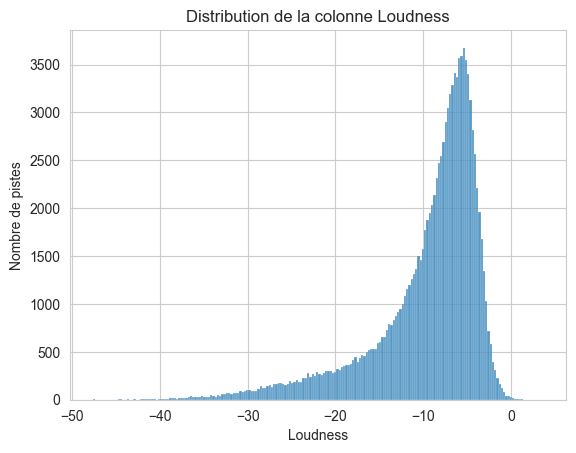

In [347]:
counts_loudness = df['loudness'].value_counts()
sns.histplot(data=df, x='loudness')
plt.title('Distribution de la colonne Loudness')
plt.xlabel('Loudness')
plt.ylabel('Nombre de pistes')
plt.show()

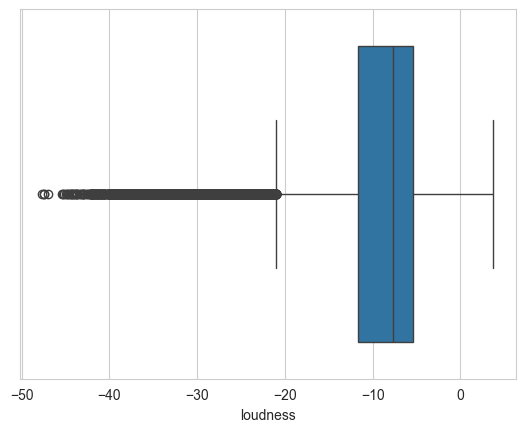

In [348]:
# Affichage d'une boite à moustache pour la variable "loudness"
# Mettre en évidence la présence d'outliers

sns.boxplot (data=df, x="loudness")
plt.show()

In [349]:
df = df[df['loudness'] <= 0]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [350]:
df = df[df['loudness'] > -25]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [351]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 110054 lignes.


##### ***Speechiness***

In [352]:
df["speechiness"].describe().T

count    110054.000000
mean          0.102039
std           0.144380
min           0.022200
25%           0.036100
50%           0.048800
75%           0.096800
max           0.967000
Name: speechiness, dtype: float64

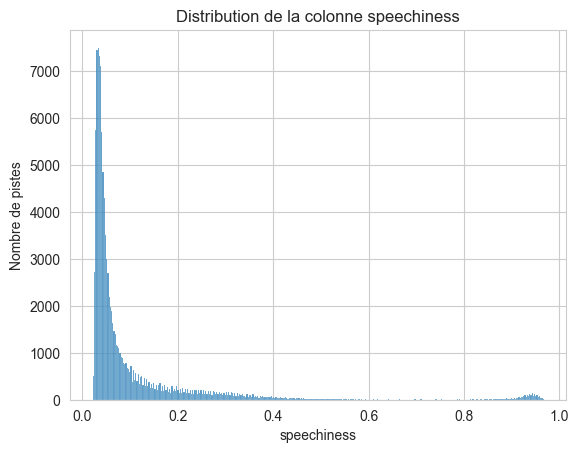

In [353]:
counts_key = df['speechiness'].value_counts()
sns.histplot(data=df, x="speechiness")
plt.title('Distribution de la colonne speechiness')
plt.xlabel('speechiness')
plt.ylabel('Nombre de pistes')
plt.show()

- On observe que la majorité des morceaux ont une "speechiness" faible (valeurs proches de 0).
- Les percentiles montrent que 90% des morceaux ont une valeur inférieure à 0.278, ce qui indique que les morceaux très "parlés" sont rares.
- La moyenne (mean) est de 0.120765, ce qui confirme que la plupart des morceaux contiennent peu de paroles selon ce critère.

In [354]:
df = df[df['speechiness']<=0.66]

In [355]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 107897 lignes.


##### ***Valence***

In [356]:
df['valence'].describe()

count    107897.000000
mean          0.471655
std           0.263187
min           0.017600
25%           0.252000
50%           0.468000
75%           0.685000
max           1.000000
Name: valence, dtype: float64

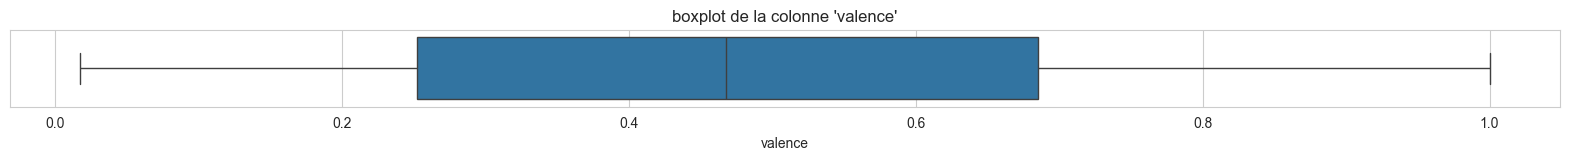

In [357]:
plt.figure(figsize=(20, 1))
sns.boxplot(x=df['valence'])
plt.title("boxplot de la colonne 'valence'")
plt.show()

Voir la corrélation avec le mode et peut être la clé.

# **Enrichissement**

- Réviser la colonne genre.
- agrémenter des paroles.
- agrémenter des pochettes d'album

**API LAST FM**

**SPOTIFY API**

**MUSICBRAINZ**

utiliser une API cache locale ou un dump JSON pré-téléchargé 

# **Analyse de corrélation**